In [1]:
# Setup display width, load packages, import symbols
ENV["COLUMNS"]=72
using Pkg; for p in ("Knet","Plots"); haskey(Pkg.installed(),p) || Pkg.add(p); end
using Base.Iterators: flatten
using Statistics: mean
using Random
using Knet: Knet, conv4, pool, mat, adam,KnetArray, momentum,nll, zeroone,save, load ,progress, sgd, param, param0, dropout, relu, Data,gpu,minibatch

In [2]:
import Knet.load
import Knet.save
import AutoGrad

In [4]:
Pkg.status()

    Status `~/.julia/environments/v1.1/Project.toml`
  [6710c13c] AutoGrad v1.1.3
  [944b1d66] CodecZlib v0.5.2
  [5ae59095] Colors v0.9.5
  [5789e2e9] FileIO v1.0.6
  [7073ff75] IJulia v1.18.0
  [6218d12a] ImageMagick v0.7.1
  [916415d5] Images v0.17.3
  [033835bb] JLD2 v0.1.2
  [682c06a0] JSON v0.20.0
  [1902f260] Knet v1.2.1
  [ae8d54c2] Luxor v1.2.0
  [23992714] MAT v0.5.0
  [91a5bcdd] Plots v0.24.0
  [438e738f] PyCall v1.91.1
  [5e47fb64] TestImages v0.5.0


In [22]:
using Images, Colors

In [8]:
cd()
cd("Desktop/DeepProject/21.04.19")
X=load("datax2.jld2","a");
Y=load("datay.jld2","b");
Z=load("dataz.jld2","c");
summary(X)

"224×224×3×1440 Array{Float64,4}"

In [23]:
summary(Y)
Y

1440-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6
 6

In [9]:
ind=randperm(size(Y,1));
Ynew=Y[ind];
Xnew=X[:,:,:,ind];
Znew=Z[:,:,:,ind];
summary(Ynew)
Ynew

1440-element Array{Int64,1}:
 5
 2
 1
 4
 2
 4
 6
 4
 3
 1
 1
 3
 3
 ⋮
 5
 3
 6
 6
 5
 1
 6
 2
 2
 4
 4
 6

In [8]:
1296/1440

0.9

In [10]:
Xdtrn=Xnew[:,:,:,1:1296]
Ydtrn=Ynew[1:1296];
Zdtrn=Znew[:,:,:,1:1296]
summary(Ydtrn)
Ydtrn

1296-element Array{Int64,1}:
 5
 2
 1
 4
 2
 4
 6
 4
 3
 1
 1
 3
 3
 ⋮
 1
 6
 1
 6
 5
 5
 1
 3
 3
 6
 5
 4

In [11]:
dtrn=minibatch(Xdtrn,Ydtrn,32;xsize=(224,224,3,32),xtype=atype(),ytype=Array{UInt8,1})

Data{Tuple{KnetArray{Float32,4},Array{UInt8,1}}}([0.427451 0.435294 … 0.203922 0.866667; 0.423529 0.431373 … 0.2 0.862745; … ; 0.184314 0.45098 … 0.0470588 0.0392157; 0.188235 0.435294 … 0.0431373 0.0431373], [5 2 … 5 4], 32, 1296, false, 1265, 1:1296, false, (224, 224, 3, 32), (1296,), KnetArray{Float32,N} where N, Array{UInt8,1})

In [8]:
(x,y) = first(dtrn)
println.(summary.((x,y)));

ErrorException: KnetPtr: bad device id -1.

In [28]:
convert(Array{Int8,1},y)

32-element Array{Int8,1}:
 2
 1
 1
 1
 3
 6
 5
 4
 3
 3
 4
 2
 4
 ⋮
 3
 5
 6
 3
 6
 3
 6
 6
 4
 4
 6
 6

In [13]:
Xtst=Xnew[:,:,:,1297:1440];
Ytst=Ynew[1297:1440];
Ztst=Znew[:,:,:,1297:1440];

In [14]:
dtst=minibatch(Xtst,Ytst,32;xsize=(224,224,3,32),xtype=atype(),ytype=Array{UInt8,1})

Data{Tuple{KnetArray{Float32,4},Array{UInt8,1}}}([0.866667 0.286275 … 0.54902 0.745098; 0.858824 0.286275 … 0.521569 0.745098; … ; 0.0392157 0.454902 … 0.360784 0.298039; 0.0431373 0.458824 … 0.333333 0.309804], [5 5 … 4 6], 32, 144, false, 113, 1:144, false, (224, 224, 3, 32), (144,), KnetArray{Float32,N} where N, Array{UInt8,1})

In [15]:
cd()
cd("Desktop/DeepProject")
Knet.save("dtst.jld2","m",dtst)
Knet.save("dtrn.jld2","m",dtrn)

In [3]:
cd()
cd("Desktop/DeepProject/minibatches/m1")
dtst=Knet.load("dtsty2.jld2","m")
dtrn=Knet.load("dtrny2.jld2","m")

Data{Tuple{KnetArray{Float32,4},Array{UInt8,1}}}([0.796078 0.607843 … 0.423529 0.423529; 0.796078 0.596078 … 0.419608 0.415686; … ; 0.482353 0.294118 … 0.698039 0.337255; 0.466667 0.313725 … 0.698039 0.329412], [6 6 … 1 1], 32, 1080, false, 1049, 1:1080, false, (224, 224, 3, 32), (1080,), KnetArray{Float32,N} where N, Array{UInt8,1})

In [4]:
cd()
cd("Desktop/DeepProject/minibatches/m1")
dtest=Knet.load("dtest.jld2","m")

Data{Tuple{KnetArray{Float32,4},Array{UInt8,1}}}([0.623529 0.717647 … 0.294118 0.870588; 0.611765 0.705882 … 0.286275 0.882353; … ; 0.301961 0.0588235 … 0.0431373 0.588235; 0.313725 0.054902 … 0.0431373 0.6], [2 5 … 4 2], 32, 180, false, 149, 1:180, false, (224, 224, 3, 32), (180,), KnetArray{Float32,N} where N, Array{UInt8,1})

In [6]:
summary(dtrn)

"33-element Data{Tuple{KnetArray{Float32,4},Array{UInt8,1}}}"

In [38]:
(x,y) = first(dtst)
println.(summary.((x,y)));

224×224×3×32 KnetArray{Float32,4}
32-element Array{UInt8,1}


In [25]:
convert(Array{Int8,1},y1)

32-element Array{Int8,1}:
 1
 4
 4
 1
 2
 1
 1
 2
 3
 5
 3
 6
 6
 ⋮
 5
 6
 6
 6
 5
 6
 1
 5
 2
 3
 5
 6

In [47]:
# For running experiments
function trainresults(file,model; o...)
    if (print("Train from scratch? "); readline()[1]=='y')
        takeevery(n,itr) = (x for (i,x) in enumerate(itr) if i % n == 1)
        r = ((model(dtrn), model(dtst), zeroone(model,dtrn), zeroone(model,dtst))
             for x in takeevery(length(dtrn), progress(adam(model,repeat(dtrn,100);lr=1e-5))))
        r = reshape(collect(Float32,flatten(r)),(4,:))
        Knet.save(file,"results",r)
        Knet.gc() # To save gpu memory
    else
        isfile(file) || download("http://people.csail.mit.edu/deniz/models/tutorial/$file",file)
        r = Knet.load(file,"results")
    end
    println(minimum(r,dims=2))
    return r
end

trainresults (generic function with 1 method)

In [22]:
cd()
cd(readdir, "Desktop/DeepProject")

22-element Array{String,1}:
 "21.04.19"          
 "28.04"             
 "CNNModel.ipynb"    
 "Dataset.ipynb"     
 "Deep (1).ipynb"    
 "DeepCNNMOdel.ipynb"
 "cnn1.jld2"         
 "cnn2.jld2"         
 "datax.jld2"        
 "datay.jld2"        
 "dtrn.jld2"         
 "dtst.jld2"         
 "lenet1.jld2"       
 "lenet1last.jld2"   
 "lenet1last2.jld2"  
 "lenet1last3.jld2"  
 "lenet1last4.jld2"  
 "lenet1last5.jld2"  
 "lenet1last6.jld2"  
 "lenet1loss.jld2"   
 "minibatches"       
 "minitest.jld2"     

In [23]:
cd("Desktop/DeepProject")
CC=Knet.load("lenet1loss.jld2","b")

Chain((Conv0(P(KnetArray{Float32,4}(3,3,3,64)), P(KnetArray{Float32,4}(1,1,64,1)), Knet.relu, 0), Conv0(P(KnetArray{Float32,4}(3,3,64,128)), P(KnetArray{Float32,4}(1,1,128,1)), Knet.relu, 0), Conv0(P(KnetArray{Float32,4}(3,3,128,256)), P(KnetArray{Float32,4}(1,1,256,1)), Knet.relu, 0), Conv0(P(KnetArray{Float32,4}(3,3,256,256)), P(KnetArray{Float32,4}(1,1,256,1)), Knet.relu, 0), Conv1(P(KnetArray{Float32,4}(3,3,256,512)), P(KnetArray{Float32,4}(1,1,512,1)), Knet.relu, 0)))

In [22]:
T=param(randn(5,5))

5×5 AutoGrad.Param{Array{Float64,2}}:
  1.25018    0.252622   1.16405   -1.0348    -0.393669 
  0.786979   0.592132  -0.773125  -1.05423    0.500162 
 -0.425553   1.66859   -2.11647   -0.12747    0.991271 
  0.205184  -0.950356  -0.557754   2.66108    1.06155  
 -1.29848    1.85338    0.956898  -0.623758   0.0956832

In [25]:
param(T.value)

5×5 AutoGrad.Param{Array{Float64,2}}:
  1.25018    0.252622   1.16405   -1.0348    -0.393669 
  0.786979   0.592132  -0.773125  -1.05423    0.500162 
 -0.425553   1.66859   -2.11647   -0.12747    0.991271 
  0.205184  -0.950356  -0.557754   2.66108    1.06155  
 -1.29848    1.85338    0.956898  -0.623758   0.0956832

In [32]:
CC.layers[1].w.opt

Knet.Adam(0.001, 0.9, 0.999, 1.0e-8, 8000, 0.0, Float32[2.06537 2.05967 2.05348; 2.06456 2.05972 2.05148; 2.06185 2.05614 2.04863]

Float32[1.57346 1.56816 1.56325; 1.57353 1.569 1.56274; 1.57287 1.56754 1.56099]

Float32[1.53115 1.52696 1.52307; 1.52994 1.52622 1.52112; 1.52622 1.52283 1.51794]

Float32[-2.87216 -2.8351 -2.81417; -2.78557 -2.74413 -2.72375; -2.70885 -2.66778 -2.64987]

Float32[-2.00073 -1.96908 -1.95629; -1.91606 -1.87941 -1.86875; -1.84945 -1.8128 -1.80216]

Float32[-2.10886 -2.08155 -2.06811; -2.03513 -2.00407 -1.9911; -1.96788 -1.93563 -1.92676]

Float32[-1.80895 -1.7842 -1.77152; -1.80366 -1.78016 -1.76752; -1.80353 -1.78046 -1.76753]

Float32[-1.30658 -1.28326 -1.27284; -1.30226 -1.27973 -1.26955; -1.3057 -1.28335 -1.27199]

Float32[-1.31704 -1.29619 -1.28787; -1.3138 -1.29542 -1.288; -1.31502 -1.2966 -1.28897]

...

Float32[1.37772 1.37662 1.3746; 1.38036 1.37909 1.37594; 1.38419 1.38239 1.37944]

Float32[1.07708 1.07522 1.0735; 1.08017 1.07906 1.0761; 1.08572 1

In [9]:
# Let's define a chain of layers
struct Chain
    layers
    Chain(layers...) = new(layers)
end
(c::Chain)(x) = (for l in c.layers; x = l(x); end; x)
(c::Chain)(x,y) = nll(c(x),y)
(c::Chain)(d::Data) = mean(c(x,y) for (x,y) in d)

In [10]:
# Define a convolutional layer:
struct Conv; w; b; f; p; end
(c::Conv)(x) = c.f.(pool(conv4(c.w, dropout(x,c.p)) .+ c.b))
Conv(w1::Int,w2::Int,cx::Int,cy::Int,f=relu;pdrop=0) = Conv(param(w1,w2,cx,cy), param0(1,1,cy,1), f, pdrop)

Conv

In [11]:
# Define a convolutional layer:
struct Conv0; w; b; f; p; end
(c::Conv0)(x) = c.f.(pool(conv4(c.w, dropout(x,c.p);padding=1).+ c.b;window=3,stride=2))
Conv0(w1::Int,w2::Int,cx::Int,cy::Int,f=relu;pdrop=0) = Conv0(param(w1,w2,cx,cy), param0(1,1,cy,1), f, pdrop)

Conv0

In [12]:
# Define a convolutional layer:
struct Conv01; w; b; f; p; end
(c::Conv01)(x) = c.f.(pool(conv4(c.w, dropout(x,c.p);padding=1).+ c.b;window=3,stride=2))
Conv01(w ,b,f=relu;pdrop=0) = Conv01(w ,b, f, pdrop)

Conv01

In [20]:
# Define a convolutional layer:
struct Conv1; w; b; f; p; end
(c::Conv1)(x) = c.f.(pool(conv4(c.w, dropout(x,c.p);padding=1).+ c.b;window=3,padding=1,stride=2))
Conv1(w1::Int,w2::Int,cx::Int,cy::Int,f=relu;pdrop=0) = Conv1(param(w1,w2,cx,cy), param0(1,1,cy,1), f, pdrop)


Conv1

In [27]:
# Define a convolutional layer:
struct Conv11; w; b; f; p; end
(c::Conv11)(x) = c.f.(pool(conv4(c.w, dropout(x,c.p);padding=1).+ c.b;window=3,padding=1,stride=2))
Conv11(w ,b,f=relu;pdrop=0) = Conv11(w ,b, f, pdrop)


Conv11

In [13]:
# Redefine dense layer (See mlp.ipynb):
struct Dense; w; b; f; p; end
(d::Dense)(x) = d.f.(d.w * mat(dropout(x,d.p)) .+ d.b) # mat reshapes 4-D tensor to 2-D matrix so we can use matmul
Dense(i::Int,o::Int,f=relu;pdrop=0) = Dense(param(o,i), param0(o), f, pdrop)

Dense

In [48]:
lenet =   Chain(Conv0(3,3,3,64),
                 Conv0(3,3,64,128),
                 Conv0(3,3,128,256),
                Conv0(3,3,256,256),
                Conv1(3,3,256,512),
                Dense(7*7*512,256,pdrop=0.5),
                    Dense(256,6,identity))
summary.(l.w for l in lenet.layers)

7-element Array{String,1}:
 "3×3×3×64 AutoGrad.Param{KnetArray{Float32,4}}"   
 "3×3×64×128 AutoGrad.Param{KnetArray{Float32,4}}" 
 "3×3×128×256 AutoGrad.Param{KnetArray{Float32,4}}"
 "3×3×256×256 AutoGrad.Param{KnetArray{Float32,4}}"
 "3×3×256×512 AutoGrad.Param{KnetArray{Float32,4}}"
 "256×25088 AutoGrad.Param{KnetArray{Float32,2}}"  
 "6×256 AutoGrad.Param{KnetArray{Float32,2}}"      

In [39]:
lenet(x)

UndefVarError: UndefVarError: lenet not defined

In [52]:
zeroone(lenet,dtest)

ErrorException: Out of gpu memory

In [32]:
1-0.175

0.825

In [24]:
CC.layers[1].w.opt=nothing
CC.layers[2].w.opt=nothing
CC.layers[3].w.opt=nothing
CC.layers[4].w.opt=nothing
CC.layers[5].w.opt=nothing

In [25]:
CC.layers[1].b.opt=nothing
CC.layers[2].b.opt=nothing
CC.layers[3].b.opt=nothing
CC.layers[4].b.opt=nothing
CC.layers[5].b.opt=nothing

In [44]:
w1=param(CC.layers[1].w.value)

BoundsError: BoundsError

In [28]:
lenet2 =   Chain(Conv01(CC.layers[1].w,CC.layers[1].b),
                 Conv01(CC.layers[2].w,CC.layers[2].b),
                 Conv01(CC.layers[3].w,CC.layers[3].b),
                Conv01(CC.layers[4].w,CC.layers[4].b),
                Conv11(CC.layers[5].w,CC.layers[5].b),
                 Dense(7*7*512,256,pdrop=0.5),
                    Dense(256,6,identity))
summary.(l.w for l in lenet2.layers)

7-element Array{String,1}:
 "3×3×3×64 AutoGrad.Param{KnetArray{Float32,4}}"   
 "3×3×64×128 AutoGrad.Param{KnetArray{Float32,4}}" 
 "3×3×128×256 AutoGrad.Param{KnetArray{Float32,4}}"
 "3×3×256×256 AutoGrad.Param{KnetArray{Float32,4}}"
 "3×3×256×512 AutoGrad.Param{KnetArray{Float32,4}}"
 "256×25088 AutoGrad.Param{KnetArray{Float32,2}}"  
 "6×256 AutoGrad.Param{KnetArray{Float32,2}}"      

In [40]:
lenet2(x)

6×32 KnetArray{Float32,2}:
  3.49134   -6.59363  -3.16917  …   3.0695   14.9544    8.71627
  0.636168  -6.54648  -3.08373     -2.68332   2.1633   16.1988 
 13.1142     9.05847   9.11734     15.4011   -4.23388  -2.64853
 -0.217048   4.21947   5.01197      1.10378  -4.75542  -4.06968
  0.847323  -3.04748   2.83288      1.8541    8.64995   4.14941
  4.44896   11.0579    2.6405   …   8.03035  -8.96704  -8.86431

In [37]:
zeroone(lenet2,dtst)

0.0625

In [49]:
cnn = trainresults("cnn2.jld2", lenet);

Train from scratch? stdin> y
1.74e-01  100.00%┣█████████████████████┫ 3300/3300 [09:35/09:35, 5.74i/s]
Float32[0.083246; 0.345735; 0.0123106; 0.08125]


In [33]:
using Plots; default(fmt=:png,ls=:auto)

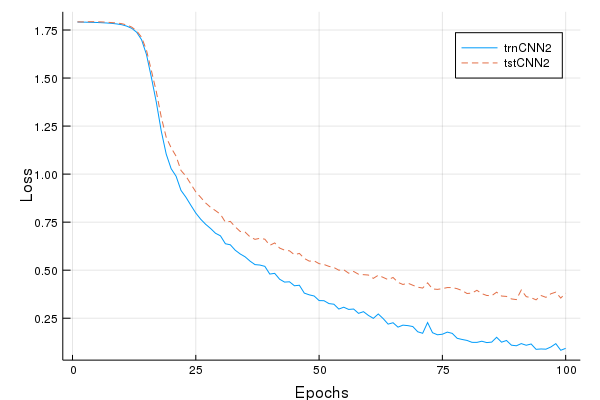

In [50]:
plot([cnn[1,:], cnn[2,:]],
     labels=[:trnCNN2 :tstCNN2],xlabel="Epochs",ylabel="Loss")

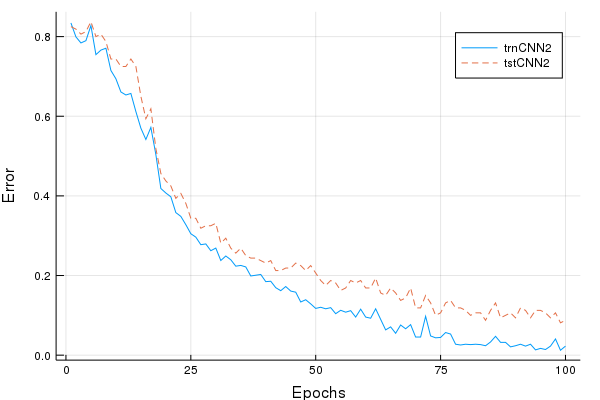

In [51]:
plot([cnn[3,:], cnn[4,:]],
     labels=[:trnCNN2 :tstCNN2],xlabel="Epochs",ylabel="Error")